<a href="https://colab.research.google.com/github/EvaLaussac/Temporal-NDVI-Analysis-for-Coffee-Crop-Classification-Using-SATVeg-and-Machine-Learning/blob/main/Copy_of_NDVI_Coffee_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Pre-Prossesing

Mounted at /content/drive


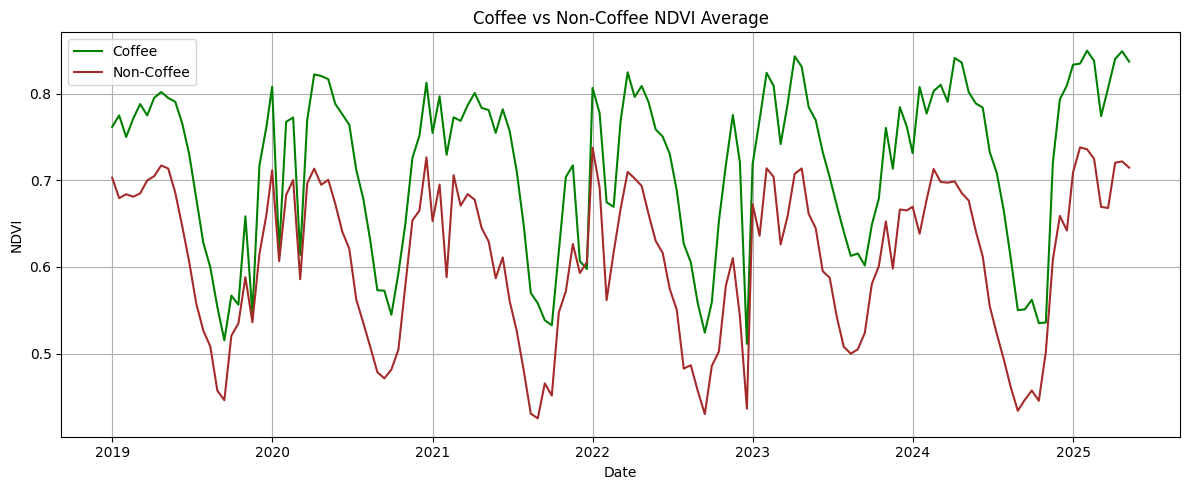

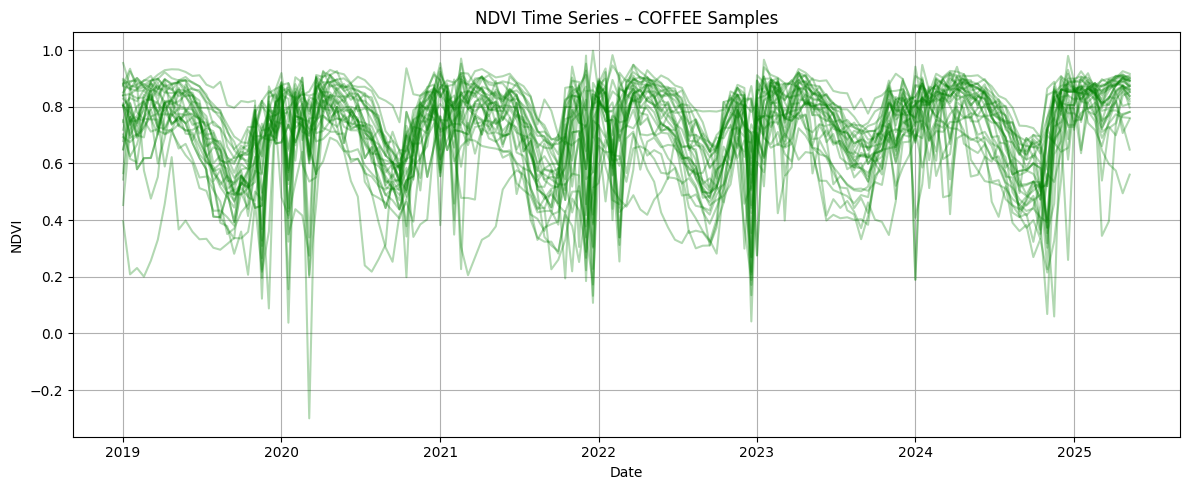

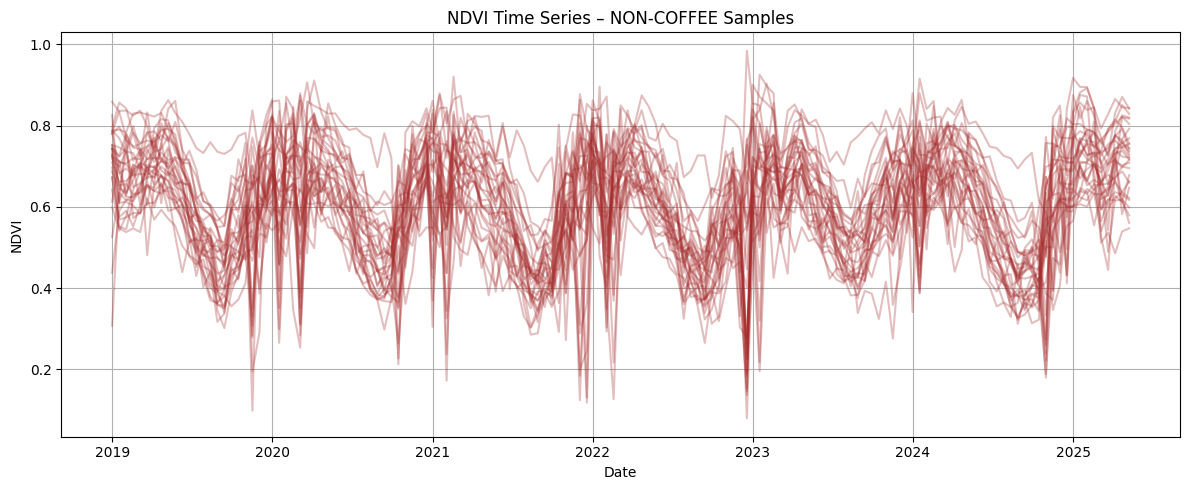

In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from google.colab import drive

drive.mount('/content/drive')

full_dataset = pd.read_excel('/content/drive/MyDrive/Dissertação/dataset ndvi/satveg_coffee_merged_ndvi.xlsx')

# Separate base information and NVDI columns
base_columns = ['Index', 'Coffee (1-YES; 0-NO)', 'Long', 'Lat']
ndvi_columns = [col for col in full_dataset.columns if col not in base_columns]

# Filter last 6 years of NDVI data
ndvi_recent_cols = [col for col in ndvi_columns if datetime.strptime(col, "%d/%m/%Y").year >= 2019]

# Create a new DataFrame with base info + filtered NDVI columns
filtered_dataset = full_dataset[base_columns + ndvi_recent_cols]

# Show resulting columns
filtered_dataset.head(), filtered_dataset.shape

# Separate coffee and non-coffee subsets
coffee_df = filtered_dataset[filtered_dataset['Coffee (1-YES; 0-NO)'] == 1]
non_coffee_df = filtered_dataset[filtered_dataset['Coffee (1-YES; 0-NO)'] == 0]

# Prepare time axis from the column headers
ndvi_dates = filtered_dataset.columns[4:]
ndvi_dates_dt = [datetime.strptime(date, "%d/%m/%Y") for date in ndvi_dates]

# Calculate average NDVI of both classes
avg_coffee = coffee_df[ndvi_dates].mean()
avg_non_coffee = non_coffee_df[ndvi_dates].mean()

# Plot the graph
plt.figure(figsize=(12, 5))
plt.plot(ndvi_dates_dt, avg_coffee, label='Coffee', color='green')
plt.plot(ndvi_dates_dt, avg_non_coffee, label='Non-Coffee', color='brown')
plt.title('Coffee vs Non-Coffee NDVI Average')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Coffee samples graph
plt.figure(figsize=(12, 5))
for _, row in coffee_df.iterrows():
    plt.plot(ndvi_dates_dt, row[ndvi_dates], color='green', alpha=0.3)
plt.title('NDVI Time Series – COFFEE Samples')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.grid(True)
plt.tight_layout()
plt.show()

# Non-coffee samples graph
plt.figure(figsize=(12, 5))
for _, row in non_coffee_df.iterrows():
    plt.plot(ndvi_dates_dt, row[ndvi_dates], color='brown', alpha=0.3)
plt.title('NDVI Time Series – NON-COFFEE Samples')
plt.xlabel('Date')
plt.ylabel('NDVI')
plt.grid(True)
plt.tight_layout()
plt.show()

# Coffee Classification - Random Forest


Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12


⏱️ Starting Stratified 5-Fold Cross-Validation (Random Forest):

Fold 1: Precision = 1.00, Recall = 0.33, F1-Score = 0.50, Accuracy = 0.67
Fold 2: Precision = 0.83, Recall = 0.83, F1-Score = 0.83, Accuracy = 0.83
Fold 3: Precision = 0.75, Recall = 1.00, F1-Score = 0.86, Accuracy = 0.83
Fold 4: Precision = 0.83, Recall = 0.83, F1-Score = 0.83, Accuracy = 0.83
Fold 5: Precision = 0.86, Recall = 1.00, F1-Score = 0.92, Accuracy = 0.92

✅ Stratified 5-Fold CV Results for Random Forest:
Average Precision: 85.48%
Average Recall:    80.00%
Average F1-Score:  78.94%
Average Accuracy:  81.67%


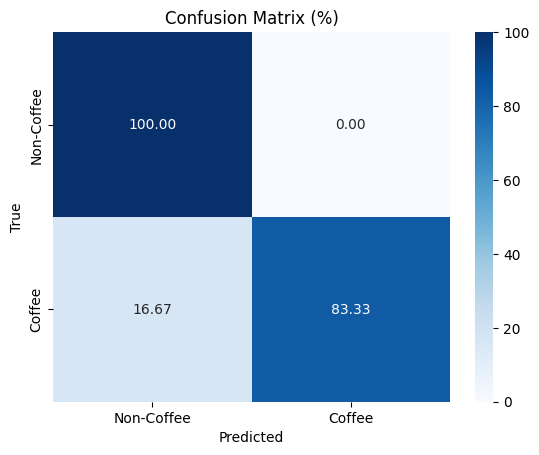

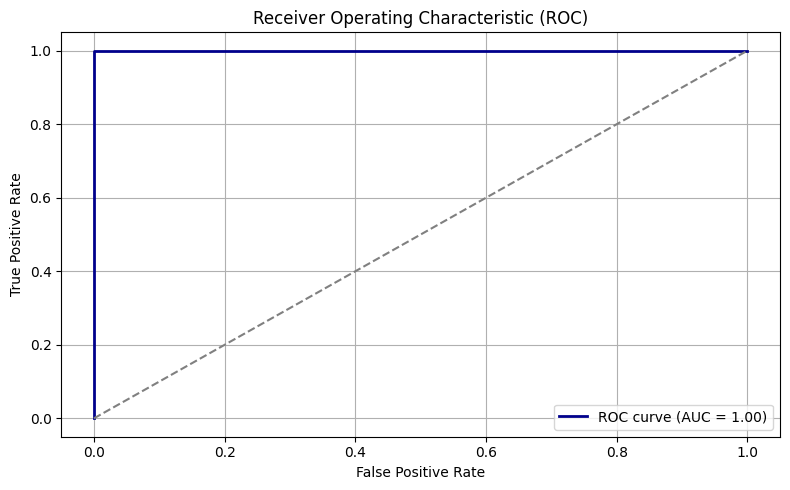

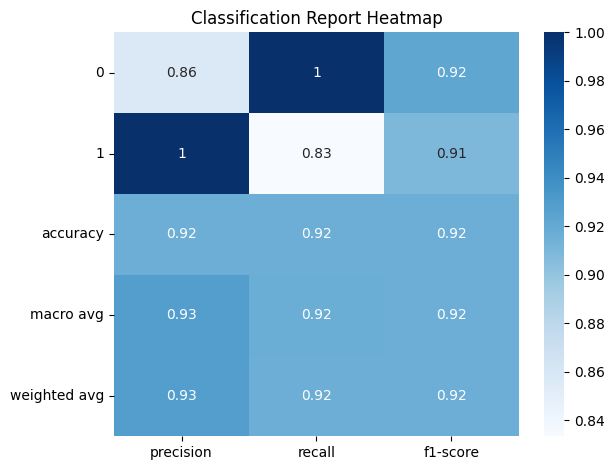

\Most Important NDVI dates/features:
          Date  Importance
97  2023-03-22    0.067451
137 2024-12-18    0.045193
141 2025-02-18    0.031681
90  2022-12-03    0.030518
89  2022-11-17    0.029850
56  2021-06-10    0.029543
74  2022-03-22    0.027710
77  2022-05-09    0.026905
140 2025-02-02    0.026471
73  2022-03-06    0.025925


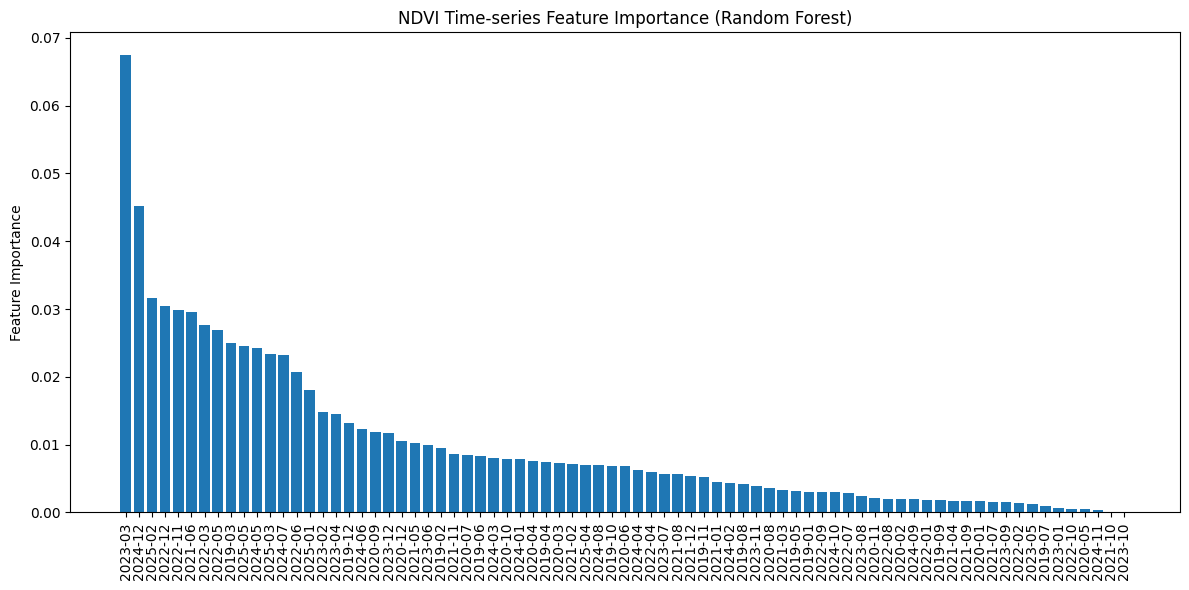

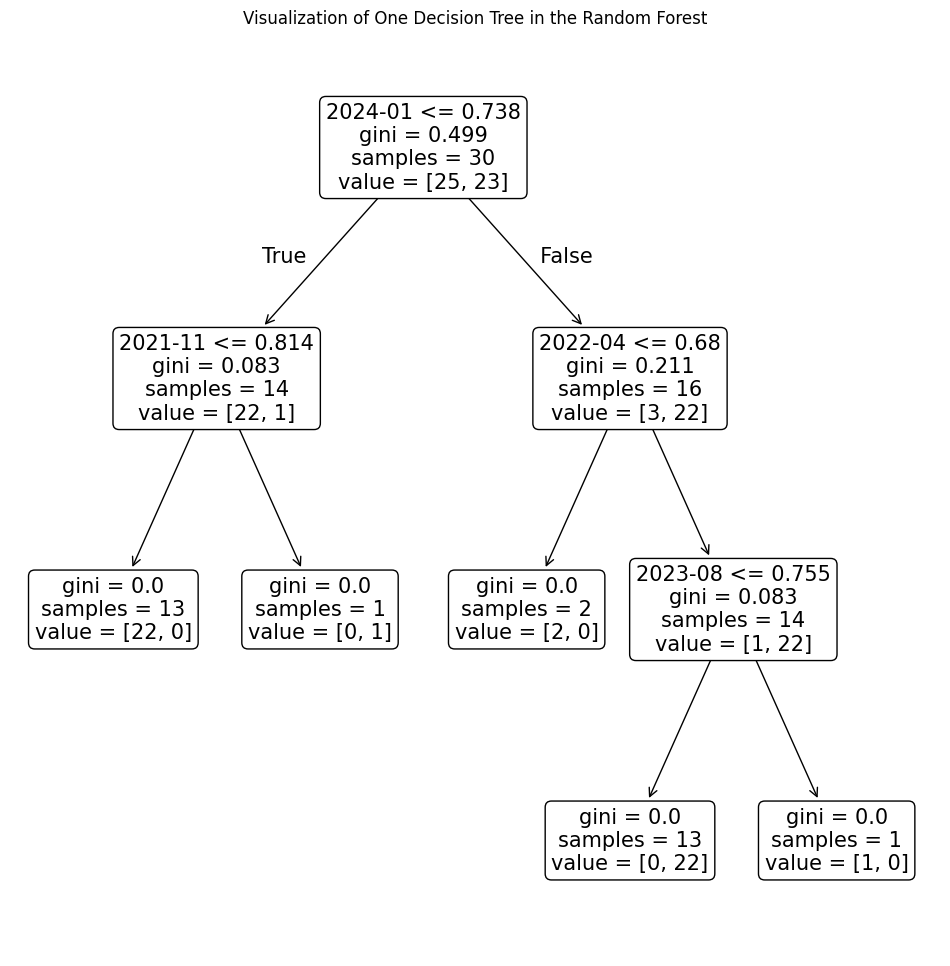

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/tmp/ipython-input-7-2480190843.py:161: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date_obj = pd.to_datetime(str(date_str), errors='coerce')
/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/tmp/ipython-input-7-2480190843.py:161: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date_obj = pd.to_datetime(str(date_str), errors='coerce')
/usr/local/lib/python3.11/dist-package


📊 Predictions on Validation Samples:

satveg_coffee sample 06_Fazenda  Cinco Estrelas.xlsx:
  ↳ Predicted: Coffee ✅
  ↳ Probability - Coffee: 0.72 | Non-Coffee: 0.28
------------------------------------------------------------
satveg_coffee sample 01_Fazenda Boa Vista.xlsx:
  ↳ Predicted: Coffee ✅
  ↳ Probability - Coffee: 0.66 | Non-Coffee: 0.34
------------------------------------------------------------
satveg_coffee sample 02_Fazenda Boa Vista.xlsx.xlsx:
  ↳ Predicted: Coffee ✅
  ↳ Probability - Coffee: 0.83 | Non-Coffee: 0.17
------------------------------------------------------------
satveg_coffee sample 03_Fazenda Boa Vista.xlsx:
  ↳ Predicted: Coffee ✅
  ↳ Probability - Coffee: 0.87 | Non-Coffee: 0.13
------------------------------------------------------------
satveg_coffee sample 04_Fazenda Cinco Estrelas.xlsx:
  ↳ Predicted: Coffee ✅
  ↳ Probability - Coffee: 0.89 | Non-Coffee: 0.11
------------------------------------------------------------
satveg_coffee sample 05_Fazend

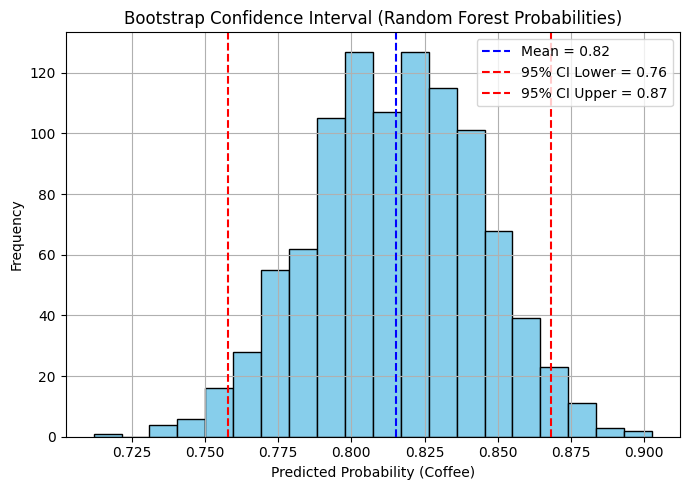

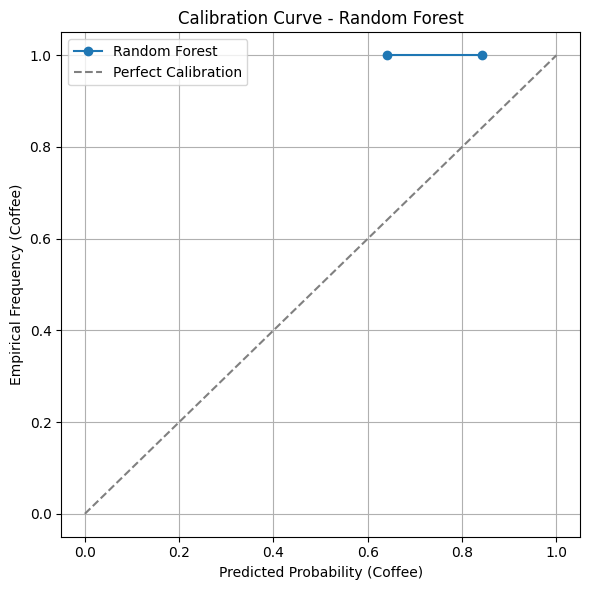

In [7]:
# Using Random Forest to classify coffee by NDVI spectrum

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import plot_tree
from sklearn.calibration import calibration_curve
from sklearn.utils import resample
from google.colab import drive, files


# Features and labels
X = filtered_dataset[ndvi_dates].values
y = filtered_dataset['Coffee (1-YES; 0-NO)'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ANALYSIS

# K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
precision_list, recall_list, f1_list, accuracy_list = [], [], [], []

print("\n⏱️ Starting Stratified 5-Fold Cross-Validation (Random Forest):\n")

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train_fold, X_test_fold = X[train_idx], X[test_idx]
    y_train_fold, y_test_fold = y[train_idx], y[test_idx]

    # Initialize and train Random Forest
    rf_fold = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_fold.fit(X_train_fold, y_train_fold)

    # Predict
    y_pred_fold = rf_fold.predict(X_test_fold)

    # Metrics
    precision = precision_score(y_test_fold, y_pred_fold, zero_division=0)
    recall = recall_score(y_test_fold, y_pred_fold, zero_division=0)
    f1 = f1_score(y_test_fold, y_pred_fold, zero_division=0)
    acc = accuracy_score(y_test_fold, y_pred_fold)

    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    accuracy_list.append(acc)

    print(f"Fold {fold}: Precision = {precision:.2f}, Recall = {recall:.2f}, "
          f"F1-Score = {f1:.2f}, Accuracy = {acc:.2f}")

# Final results
print("\n✅ Stratified 5-Fold CV Results for Random Forest:")
print(f"Average Precision: {np.mean(precision_list) * 100:.2f}%")
print(f"Average Recall:    {np.mean(recall_list) * 100:.2f}%")
print(f"Average F1-Score:  {np.mean(f1_list) * 100:.2f}%")
print(f"Average Accuracy:  {np.mean(accuracy_list) * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Non-Coffee', 'Coffee'],
            yticklabels=['Non-Coffee', 'Coffee'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (%)')
plt.show()


#ROC and AUC Curves
probs = rf.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Heatmap
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.tight_layout()
plt.show()

# Feature importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Date': ndvi_dates_dt,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print("\Most Important NDVI dates/features:")
print(feature_importance_df.head(10))

plt.figure(figsize=(12,6))
plt.bar(feature_importance_df['Date'].dt.strftime('%Y-%m'), feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.ylabel("Feature Importance")
plt.title("NDVI Time-series Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

# Visualizing one decision tree
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[0], feature_names=[d.strftime("%Y-%m") for d in ndvi_dates_dt],
          filled=False, rounded=True, max_depth=3)
plt.title("Visualization of One Decision Tree in the Random Forest")
plt.show()

#=============================================================#

# Random Forest Validation using real samples (automatic)

drive.mount('/content/drive')

folder_path = '/content/drive/MyDrive/Dissertação/dataset ndvi/validation sample'

results = []

# Excel Files Iteractions
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(folder_path, filename)
        excel_file = pd.ExcelFile(file_path)
        sheet_name = excel_file.sheet_names[0]
        data_sample = pd.read_excel(excel_file, sheet_name=sheet_name)

        # Identifing NDVI
        data_sample_transpose = data_sample.transpose()
        date_row = data_sample_transpose.iloc[0, 4:]
        valid_columns = []

        for i, date_str in enumerate(date_row):
            try:
                date_obj = pd.to_datetime(str(date_str), errors='coerce')
                if date_obj and date_obj.year >= 2019: #<<<< 6 years
                    valid_columns.append(i + 4)
            except:
                continue

        ndvi_sample_values = data_sample_transpose.iloc[1, valid_columns].astype(float).values
        ndvi_sample_values = ndvi_sample_values.reshape(1, -1)
        class_prob = rf.predict_proba(ndvi_sample_values)[0]
        predicted_label = rf.predict(ndvi_sample_values)[0]
        results.append({
            'File': filename,
            'Predicted_Label': 'Coffee ✅' if predicted_label == 1 else 'Non-Coffee ❌',
            'Prob_Coffee': round(class_prob[1], 4),
            'Prob_Non_Coffee': round(class_prob[0], 4)
        })

results_df = pd.DataFrame(results)

print("\n📊 Predictions on Validation Samples:\n")
for idx, row in results_df.iterrows():
    print(f"{row['File']}:")
    print(f"  ↳ Predicted: {row['Predicted_Label']}")
    print(f"  ↳ Probability - Coffee: {row['Prob_Coffee']:.2f} | Non-Coffee: {row['Prob_Non_Coffee']:.2f}")
    print("-" * 60)

# Statistic analysis graphs:
probabilities = results_df['Prob_Coffee'].tolist()
true_labels = [1] * len(results_df)

# Summary statistics on validation probabilities
mean_coffee = results_df['Prob_Coffee'].mean()
std_coffee = results_df['Prob_Coffee'].std()
mean_non_coffee = results_df['Prob_Non_Coffee'].mean()
std_non_coffee = results_df['Prob_Non_Coffee'].std()

print("📈 Summary Statistics on Validation Probabilities:")
print(f"Coffee Probability     - Mean: {mean_coffee:.4f} | Std Dev: {std_coffee:.4f}")
print(f"Non-Coffee Probability - Mean: {mean_non_coffee:.4f} | Std Dev: {std_non_coffee:.4f}")
print("-" * 60, "\n")

# Bootstrap
boot_means = [np.mean(resample(probabilities, replace=True)) for _ in range(1000)]
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)
mean_prob = np.mean(probabilities)

# Histogram
plt.figure(figsize=(7, 5))
plt.hist(boot_means, bins=20, color='skyblue', edgecolor='black')
plt.axvline(mean_prob, color='blue', linestyle='dashed', label=f"Mean = {mean_prob:.2f}")
plt.axvline(ci_lower, color='red', linestyle='--', label=f"95% CI Lower = {ci_lower:.2f}")
plt.axvline(ci_upper, color='red', linestyle='--', label=f"95% CI Upper = {ci_upper:.2f}")
plt.title('Bootstrap Confidence Interval (Random Forest Probabilities)')
plt.xlabel('Predicted Probability (Coffee)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calibration Curve
prob_true, prob_pred = calibration_curve(true_labels, probabilities, n_bins=3)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Random Forest')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Predicted Probability (Coffee)')
plt.ylabel('Empirical Frequency (Coffee)')
plt.title('Calibration Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Coffee Classification - TiDE com GRU

Epoch 1/70 - Validation Loss: 0.2372
Epoch 2/70 - Validation Loss: 0.2072
Epoch 3/70 - Validation Loss: 0.3224
Epoch 4/70 - Validation Loss: 0.1693
Epoch 5/70 - Validation Loss: 0.1574
Epoch 6/70 - Validation Loss: 0.2377
Epoch 7/70 - Validation Loss: 0.2299
Epoch 8/70 - Validation Loss: 0.1520
Epoch 9/70 - Validation Loss: 0.1447
Epoch 10/70 - Validation Loss: 0.1552
Epoch 11/70 - Validation Loss: 0.2002
Epoch 12/70 - Validation Loss: 0.2333
Epoch 13/70 - Validation Loss: 0.1867
Epoch 14/70 - Validation Loss: 0.1935
Epoch 15/70 - Validation Loss: 0.1476
Epoch 16/70 - Validation Loss: 0.0961
Epoch 17/70 - Validation Loss: 0.1972
Epoch 18/70 - Validation Loss: 0.1418
Epoch 19/70 - Validation Loss: 0.2494
Epoch 20/70 - Validation Loss: 0.1668
Epoch 21/70 - Validation Loss: 0.2768
Epoch 22/70 - Validation Loss: 0.2484
Epoch 23/70 - Validation Loss: 0.2601
Epoch 24/70 - Validation Loss: 0.2133
Epoch 25/70 - Validation Loss: 0.2330
Epoch 26/70 - Validation Loss: 0.1311
Early stopping trigge

100%|██████████| 5/5 [01:08<00:00, 13.75s/it]


Stratified 5-Fold CV Results for TiDE Model:
Average Precision: 82.95%
Average Recall:    80.00%
Average F1-Score:  81.14%


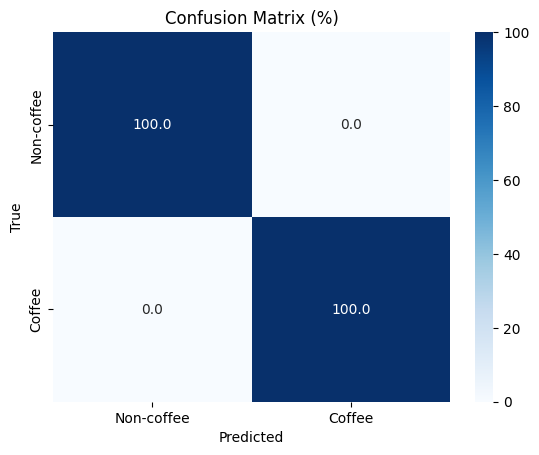

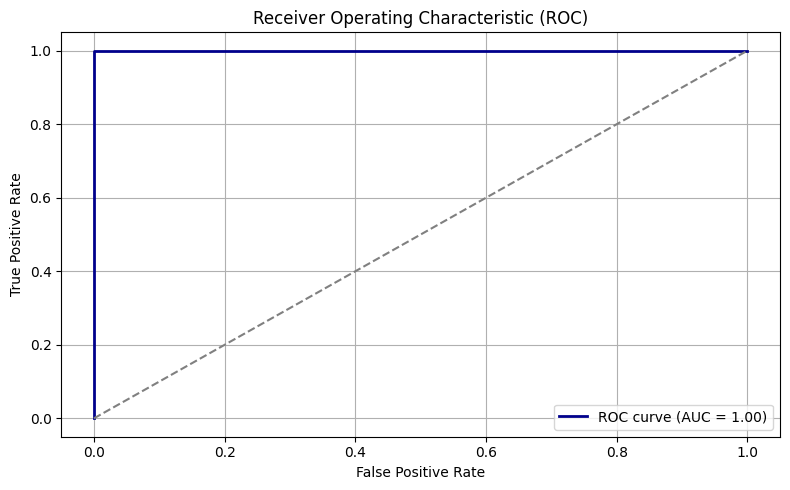

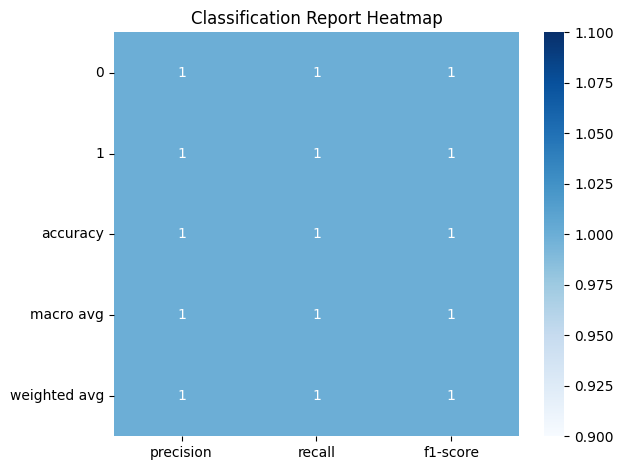

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



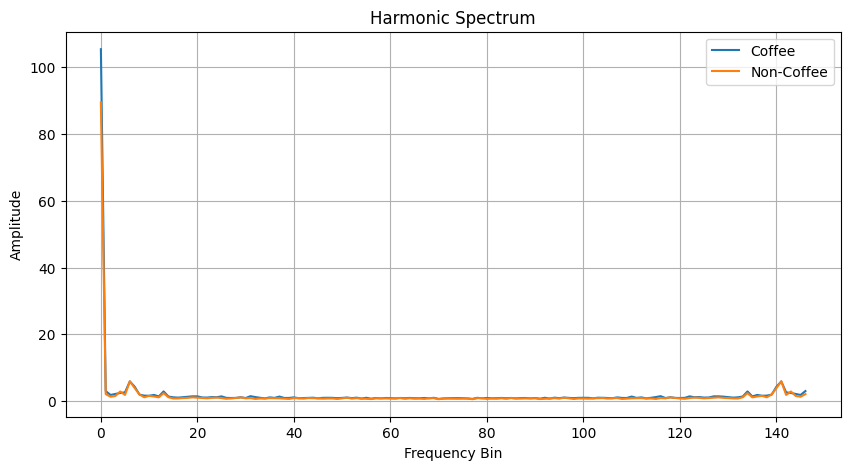

Tidal Datum Coffee (NDVI minimum mean): 0.511
Tidal Datum Non-Coffee (NDVI minimum mean): 0.425


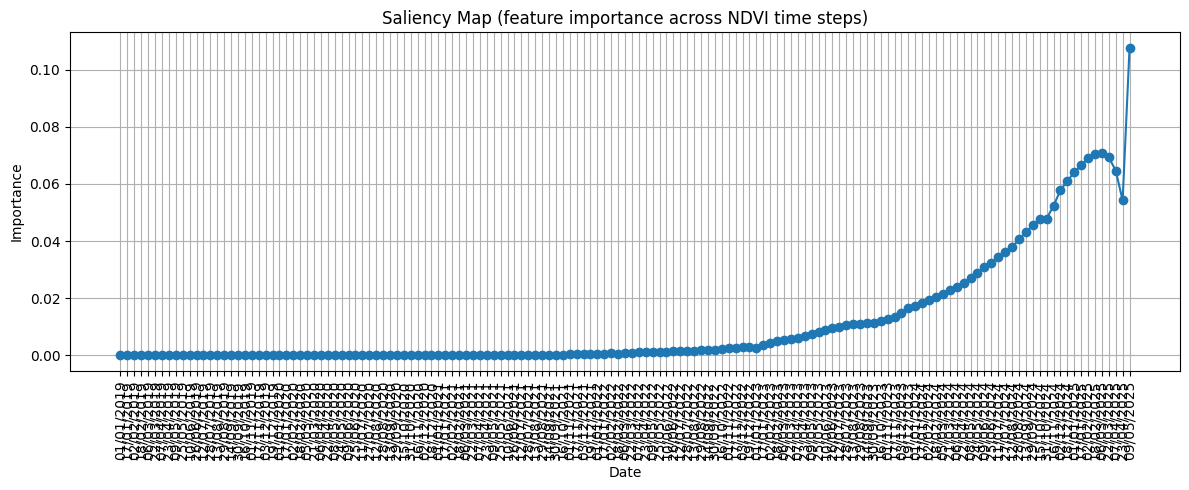

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/tmp/ipython-input-9-2468701410.py:439: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date_obj = pd.to_datetime(str(date_str), errors='coerce')
/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/tmp/ipython-input-9-2468701410.py:439: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date_obj = pd.to_datetime(str(date_str), errors='coerce')
/usr/local/lib/python3.11/dist-package


📊 Predictions on Validation Samples:

satveg_coffee sample 06_Fazenda  Cinco Estrelas.xlsx:
  ↳ Predicted: Coffee ✅
  ↳ Probability - Coffee: 0.87 | Non-Coffee: 0.13
------------------------------------------------------------
satveg_coffee sample 01_Fazenda Boa Vista.xlsx:
  ↳ Predicted: Coffee ✅
  ↳ Probability - Coffee: 0.64 | Non-Coffee: 0.36
------------------------------------------------------------
satveg_coffee sample 02_Fazenda Boa Vista.xlsx.xlsx:
  ↳ Predicted: Coffee ✅
  ↳ Probability - Coffee: 0.85 | Non-Coffee: 0.15
------------------------------------------------------------
satveg_coffee sample 03_Fazenda Boa Vista.xlsx:
  ↳ Predicted: Coffee ✅
  ↳ Probability - Coffee: 0.89 | Non-Coffee: 0.11
------------------------------------------------------------
satveg_coffee sample 04_Fazenda Cinco Estrelas.xlsx:
  ↳ Predicted: Coffee ✅
  ↳ Probability - Coffee: 0.98 | Non-Coffee: 0.02
------------------------------------------------------------
satveg_coffee sample 05_Fazend

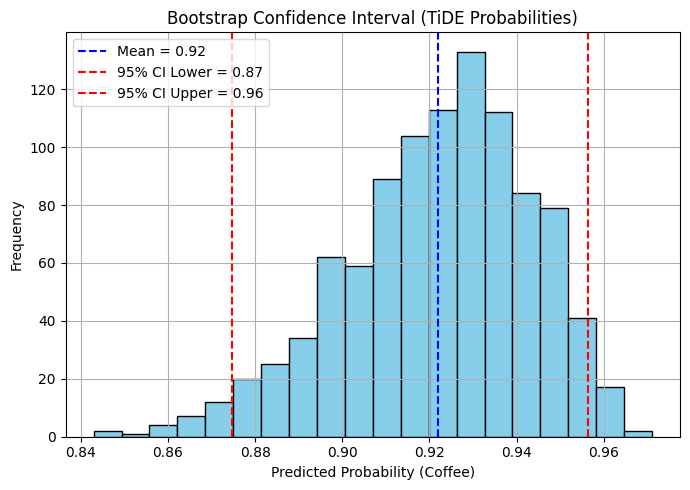

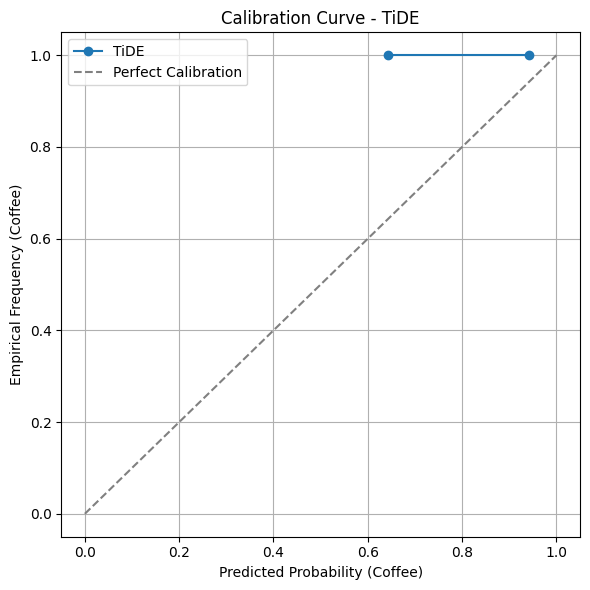

In [9]:
#TiDE Classifier com Softmax >>> MELHOR MODELO ATE AGORA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import torch
import torch.nn as nn
import torch.optim as optim
import os

from datetime import datetime
from sklearn.model_selection import train_test_split, StratifiedKFold, TimeSeriesSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report)
from sklearn.utils.class_weight import compute_class_weight
from sklearn.calibration import calibration_curve
from sklearn.utils import resample
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset
from scipy.fft import fft


# Load dataset
df = filtered_dataset.copy()

# Base and NDVI columns
base_columns = ['Index', 'Coffee (1-YES; 0-NO)', 'Long', 'Lat']
ndvi_columns = [col for col in df.columns if col not in base_columns]
ndvi_recent_cols = [col for col in ndvi_columns if datetime.strptime(col, "%d/%m/%Y").year >= 2019]

filtered_df = df[base_columns + ndvi_recent_cols]

# Prepare X, y
X_raw = filtered_df[ndvi_recent_cols].values
y = filtered_df['Coffee (1-YES; 0-NO)'].values

# Normalize NDVI series
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)
X = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Stratified Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Compute class weights
class_weights_np = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = torch.tensor(class_weights_np, dtype=torch.float32)

# Convert to torch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train, dtype=torch.long)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test, dtype=torch.long)

train_loader = DataLoader(TensorDataset(X_train_torch, y_train_torch), batch_size=8, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_torch, y_test_torch), batch_size=8)

# Improved TiDE Model (Softmax)
class ImprovedTiDE(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ImprovedTiDE, self).__init__()
        self.encoder = nn.GRU(input_size, hidden_size, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(0.5)
        self.classifier = nn.Linear(hidden_size * 2, num_classes)

    def forward(self, x):
        out, _ = self.encoder(x)
        out = self.dropout(out[:, -1, :])
        return self.classifier(out)

model = ImprovedTiDE(input_size=1, hidden_size=128, num_classes=2)
loss_fn = nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, alpha=0.98, centered=True, weight_decay=1e-3)
#optimizer = torch.optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-3) << original, melhor resultado ate agora


# Training loop

# Early Stopping Training Loop
epochs = 70
patience = 10
best_loss = float('inf')
counter = 0
best_model_state = None

for epoch in range(epochs):
    model.train()
    for xb, yb in train_loader:
        pred = model(xb)
        loss = loss_fn(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

    # --- Validation loss ---
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for xb, yb in test_loader:
            logits = model(xb)
            val_loss += loss_fn(logits, yb).item()
    val_loss /= len(test_loader)

    print(f"Epoch {epoch+1}/{epochs} - Validation Loss: {val_loss:.4f}")

    # --- Early Stopping ---
    if val_loss < best_loss:
        best_loss = val_loss
        best_model_state = copy.deepcopy(model.state_dict())
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

# Load best model weights
model.load_state_dict(best_model_state)


# Stratified K-Fold Cross-Validation for TiDE

# Database
X_raw = filtered_df[ndvi_recent_cols].values
y = filtered_df['Coffee (1-YES; 0-NO)'].values

# Normalization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_raw)
X = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Preparing K-Fold
skf = StratifiedKFold(n_splits=5)
precision_list, recall_list, f1_list = [], [], []

for train_idx, test_idx in tqdm(skf.split(X, y), total=5):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Class Weight
    class_weights_np = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
    class_weights = torch.tensor(class_weights_np, dtype=torch.float32)

    # Tensors
    X_train_torch = torch.tensor(X_train, dtype=torch.float32)
    y_train_torch = torch.tensor(y_train, dtype=torch.long)
    X_test_torch = torch.tensor(X_test, dtype=torch.float32)
    y_test_torch = torch.tensor(y_test, dtype=torch.long)

    train_loader = DataLoader(TensorDataset(X_train_torch, y_train_torch), batch_size=8, shuffle=True)
    test_loader = DataLoader(TensorDataset(X_test_torch, y_test_torch), batch_size=8)

    # Model
    model = ImprovedTiDE(input_size=1, hidden_size=128, num_classes=2)
    loss_fn = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = torch.optim.RMSprop(model.parameters(), lr=0.001, alpha=0.98, centered=True, weight_decay=1e-3)

    # Early Stopping
    best_loss = float('inf')
    patience = 10
    counter = 0
    best_model_state = None

    for epoch in range(70):
        model.train()
        for xb, yb in train_loader:
            pred = model(xb)
            loss = loss_fn(pred, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        # Validation Loss
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for xb, yb in test_loader:
                logits = model(xb)
                val_loss += loss_fn(logits, yb).item()
        val_loss /= len(test_loader)

        if val_loss < best_loss:
            best_loss = val_loss
            best_model_state = copy.deepcopy(model.state_dict())
            counter = 0
        else:
            counter += 1
            if counter >= patience:
                break

    # Load best weights
    model.load_state_dict(best_model_state)

    # Evaluation
    model.eval()
    with torch.no_grad():
        output = model(X_test_torch)
        pred = torch.argmax(output, axis=1).numpy()
        precision_list.append(precision_score(y_test, pred, zero_division=0))
        recall_list.append(recall_score(y_test, pred, zero_division=0))
        f1_list.append(f1_score(y_test, pred, zero_division=0))

# K-Fold Results
print(f"\nStratified 5-Fold CV Results for TiDE Model:")
print(f"Average Precision: {np.mean(precision_list)*100:.2f}%")
print(f"Average Recall:    {np.mean(recall_list)*100:.2f}%")
print(f"Average F1-Score:  {np.mean(f1_list)*100:.2f}%")

# Confusion Matrix
# Final prediction on test set
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for xb, yb in test_loader:
        logits = model(xb)
        pred = torch.argmax(logits, dim=1)
        y_pred.extend(pred.numpy())
        y_true.extend(yb.numpy())

cm = confusion_matrix(y_true, y_pred, normalize='true') * 100
sns.heatmap(cm, annot=True, fmt='.1f', cmap='Blues', xticklabels=['Non-coffee','Coffee'], yticklabels=['Non-coffee','Coffee'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (%)')
plt.show()

# ROC and AUC Curves for TiDE
model.eval()
all_logits = []
all_labels = []

with torch.no_grad():
    for xb, yb in test_loader:
        logits = model(xb)
        all_logits.append(logits)
        all_labels.append(yb)

# Concatenate batches
all_logits = torch.cat(all_logits, dim=0)
all_labels = torch.cat(all_labels, dim=0).numpy()

# Convert logits to probabilities
probs = torch.softmax(all_logits, dim=1)[:, 1].numpy()

from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(all_labels, probs)
roc_auc = roc_auc_score(all_labels, probs)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# TiDE Heatmap
from sklearn.metrics import classification_report
report = classification_report(all_labels, np.argmax(all_logits.numpy(), axis=1), output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.tight_layout()
plt.show()

# Classification report (text)
print(classification_report(y_true, y_pred))

# Harmonic Analysis
fft_vals = np.abs(fft(X_raw, axis=1))
mean_spectrum_coffee = fft_vals[y==1].mean(axis=0)
mean_spectrum_noncoffee = fft_vals[y==0].mean(axis=0)
plt.figure(figsize=(10,5))
plt.plot(mean_spectrum_coffee, label='Coffee')
plt.plot(mean_spectrum_noncoffee, label='Non-Coffee')
plt.title('Harmonic Spectrum')
plt.xlabel('Frequency Bin')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Tidal Datum
coffee_df = filtered_df[filtered_df['Coffee (1-YES; 0-NO)'] == 1]
non_coffee_df = filtered_df[filtered_df['Coffee (1-YES; 0-NO)'] == 0]
tidal_datum_coffee = coffee_df[ndvi_recent_cols].mean().min()
tidal_datum_noncoffee = non_coffee_df[ndvi_recent_cols].mean().min()
print(f"Tidal Datum Coffee (NDVI minimum mean): {tidal_datum_coffee:.3f}")
print(f"Tidal Datum Non-Coffee (NDVI minimum mean): {tidal_datum_noncoffee:.3f}")

# Saliency Map: feature importance visualization for TiDE
model.eval()

# pick a sample from test set
sample = X_test_torch[0].unsqueeze(0)
sample.requires_grad_()

output = model(sample)
class_idx = torch.argmax(output)
score = output[0, class_idx]
score.backward()

# Get gradient wrt input
saliency = sample.grad.abs().detach().numpy().squeeze()

# plot saliency over time
plt.figure(figsize=(12,5))
plt.plot(ndvi_recent_cols, saliency, marker='o')
plt.xticks(rotation=90)
plt.title('Saliency Map (feature importance across NDVI time steps)')
plt.ylabel('Importance')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

#=============================================================#

# TiDE Validation using real samples (automatic)

folder_path = '/content/drive/MyDrive/Dissertação/dataset ndvi/validation sample'

# Ensure model is on CPU
device = torch.device("cpu")
model.to(device)

# To store results
probabilities = []
true_labels = []
results = []

# Loop through all Excel files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(folder_path, filename)
        excel_file = pd.ExcelFile(file_path)
        sheet_name = excel_file.sheet_names[0]
        data_sample = pd.read_excel(excel_file, sheet_name=sheet_name)

        # Transpose to access NDVI dates
        data_sample_transpose = data_sample.transpose()
        date_row = data_sample_transpose.iloc[0, 4:]
        valid_columns = []

        # Select only NDVI columns from 2019 onwards
        for i, date_str in enumerate(date_row):
            try:
                date_obj = pd.to_datetime(str(date_str), errors='coerce')
                if date_obj and date_obj.year >= 2019:
                    valid_columns.append(i + 4)
            except:
                continue

        # Extract and reshape NDVI values
        ndvi_sample_values = data_sample_transpose.iloc[1, valid_columns].astype(float).values
        ndvi_sample_scaled = scaler.transform(ndvi_sample_values.reshape(1, -1))
        ndvi_sample_scaled = ndvi_sample_scaled.reshape(1, ndvi_sample_scaled.shape[1], 1)
        sample_tensor = torch.tensor(ndvi_sample_scaled, dtype=torch.float32).to(device)

        # Model inference using TiDE
        model.eval()
        with torch.no_grad():
            logits = model(sample_tensor)
            class_probs = torch.softmax(logits, dim=1).cpu().numpy()[0]
            predicted_label = 'Coffee ✅' if np.argmax(class_probs) == 1 else 'Non-Coffee ❌'

        # Store detailed result
        results.append({
            'File': filename,
            'Predicted_Label': predicted_label,
            'Prob_Coffee': round(class_probs[1], 4),
            'Prob_Non_Coffee': round(class_probs[0], 4)
        })

        # Store values for analysis
        probabilities.append(class_probs[1])  # Coffee class probability
        true_labels.append(1)

# Print prediction results for each sample
print("\n📊 Predictions on Validation Samples:\n")
for r in results:
    print(f"{r['File']}:")
    print(f"  ↳ Predicted: {r['Predicted_Label']}")
    print(f"  ↳ Probability - Coffee: {r['Prob_Coffee']:.2f} | Non-Coffee: {r['Prob_Non_Coffee']:.2f}")
    print("-" * 60)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Summary statistics on validation probabilities
mean_coffee = results_df['Prob_Coffee'].mean()
std_coffee = results_df['Prob_Coffee'].std()
mean_non_coffee = results_df['Prob_Non_Coffee'].mean()
std_non_coffee = results_df['Prob_Non_Coffee'].std()

print("📈 Summary Statistics on Validation Probabilities:")
print(f"Coffee Probability     - Mean: {mean_coffee:.4f} | Std Dev: {std_coffee:.4f}")
print(f"Non-Coffee Probability - Mean: {mean_non_coffee:.4f} | Std Dev: {std_non_coffee:.4f}")
print("-" * 60, "\n")

# Bootstrap
boot_means = [np.mean(resample(probabilities, replace=True)) for _ in range(1000)]
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)
mean_prob = np.mean(probabilities)

# Histogram with confidence interval
plt.figure(figsize=(7, 5))
plt.hist(boot_means, bins=20, color='skyblue', edgecolor='black')
plt.axvline(mean_prob, color='blue', linestyle='dashed', label=f"Mean = {mean_prob:.2f}")
plt.axvline(ci_lower, color='red', linestyle='--', label=f"95% CI Lower = {ci_lower:.2f}")
plt.axvline(ci_upper, color='red', linestyle='--', label=f"95% CI Upper = {ci_upper:.2f}")
plt.title('Bootstrap Confidence Interval (TiDE Probabilities)')
plt.xlabel('Predicted Probability (Coffee)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calibration Curve
prob_true, prob_pred = calibration_curve(true_labels, probabilities, n_bins=3)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='TiDE')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Predicted Probability (Coffee)')
plt.ylabel('Empirical Frequency (Coffee)')
plt.title('Calibration Curve - TiDE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# Coffee Classification - eXtreme Gradient Boosting (XGBoost)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:11:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:11:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:11:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



⏱️ Starting Stratified 5-Fold Cross-Validation (XGBoost):

Fold 1: Precision = 0.71, Recall = 0.83, F1-Score = 0.77, Accuracy = 0.75
Fold 2: Precision = 0.83, Recall = 0.83, F1-Score = 0.83, Accuracy = 0.83


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:11:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:11:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [23:11:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fold 3: Precision = 0.67, Recall = 1.00, F1-Score = 0.80, Accuracy = 0.75
Fold 4: Precision = 0.83, Recall = 0.83, F1-Score = 0.83, Accuracy = 0.83
Fold 5: Precision = 0.86, Recall = 1.00, F1-Score = 0.92, Accuracy = 0.92

✅ Stratified 5-Fold CV Results for XGBoost:
Average Precision: 78.10%
Average Recall:    90.00%
Average F1-Score:  83.18%
Average Accuracy:  81.67%

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



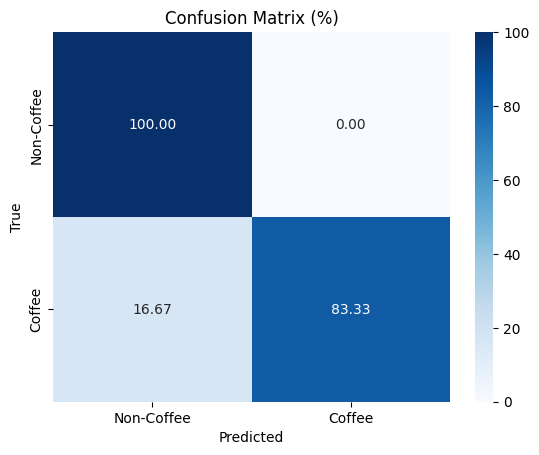

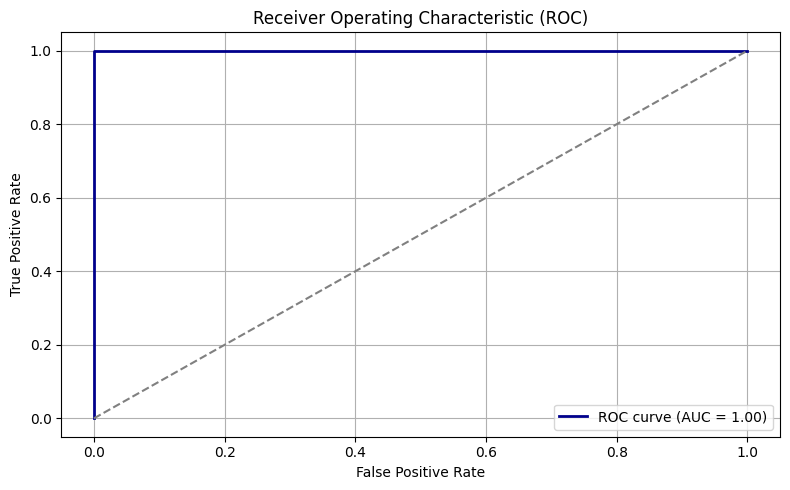

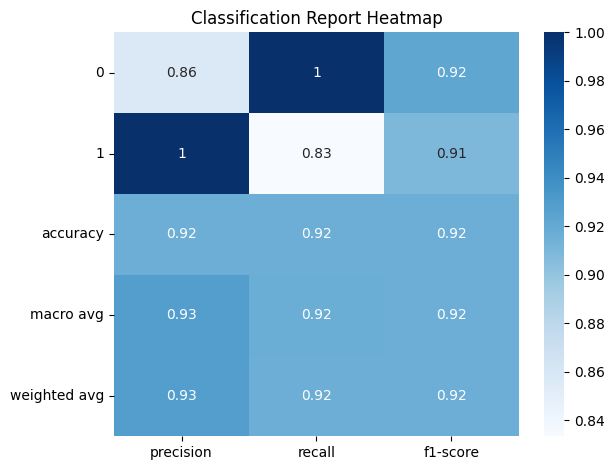

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/tmp/ipython-input-6-2291545553.py:166: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date_obj = pd.to_datetime(str(date_str), errors='coerce')
/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/tmp/ipython-input-6-2291545553.py:166: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date_obj = pd.to_datetime(str(date_str), errors='coerce')
/usr/local/lib/python3.11/dist-package


📊 Predictions on Validation Samples (XGBoost):

satveg_coffee sample 06_Fazenda  Cinco Estrelas.xlsx:
  ↳ Predicted: Coffee ✅
  ↳ Probability - Coffee: 0.84 | Non-Coffee: 0.16
------------------------------------------------------------
satveg_coffee sample 01_Fazenda Boa Vista.xlsx:
  ↳ Predicted: Non-Coffee ❌
  ↳ Probability - Coffee: 0.08 | Non-Coffee: 0.92
------------------------------------------------------------
satveg_coffee sample 02_Fazenda Boa Vista.xlsx.xlsx:
  ↳ Predicted: Coffee ✅
  ↳ Probability - Coffee: 0.98 | Non-Coffee: 0.02
------------------------------------------------------------
satveg_coffee sample 03_Fazenda Boa Vista.xlsx:
  ↳ Predicted: Coffee ✅
  ↳ Probability - Coffee: 0.99 | Non-Coffee: 0.01
------------------------------------------------------------
satveg_coffee sample 04_Fazenda Cinco Estrelas.xlsx:
  ↳ Predicted: Coffee ✅
  ↳ Probability - Coffee: 0.88 | Non-Coffee: 0.12
------------------------------------------------------------
satveg_coffee sa

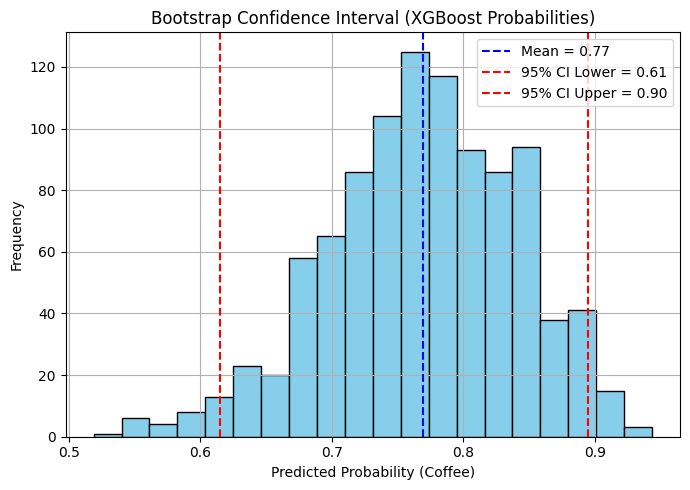

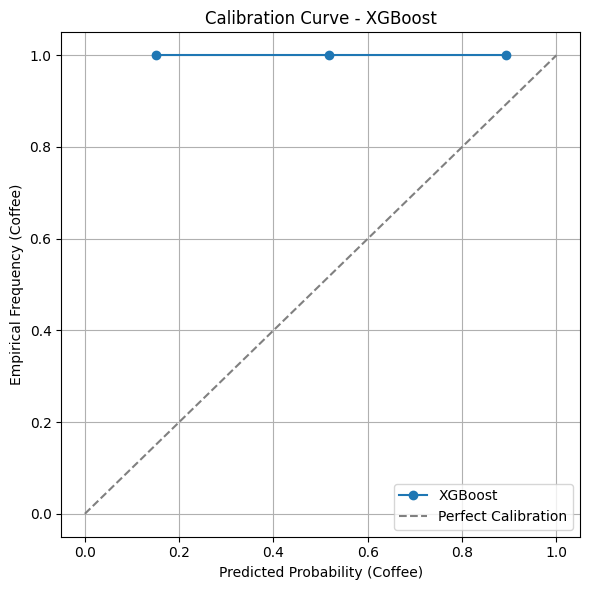

In [6]:
# Using XGBoost as Classifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.utils.class_weight import compute_class_weight
from xgboost import XGBClassifier
from google.colab import files


# Features and labels
X = filtered_dataset[ndvi_dates].values
y = filtered_dataset['Coffee (1-YES; 0-NO)'].values

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# calculate scale_pos_weight to emphasize coffee class
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=y)
scale_pos_weight = class_weights[0] / class_weights[1]

# Define the XGBClassifier without early_stopping
xgb = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    scale_pos_weight=scale_pos_weight,
    eval_metric='logloss',
    n_jobs=-1
)

# Train
xgb.fit(X_train, y_train, verbose=False)

# Predict with adjusted threshold
y_proba = xgb.predict_proba(X_test)[:, 1]
threshold = 0.3  # more sensitive to coffee class
y_pred = (y_proba > threshold).astype(int)


# K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
precision_list, recall_list, f1_list, accuracy_list = [], [], [], []

print("\n⏱️ Starting Stratified 5-Fold Cross-Validation (XGBoost):\n")

for fold, (train_idx, test_idx) in enumerate(skf.split(X, y), 1):
    X_train_fold, X_test_fold = X[train_idx], X[test_idx]
    y_train_fold, y_test_fold = y[train_idx], y[test_idx]

    # scale_pos_weight for fold
    class_weights_fold = compute_class_weight(class_weight="balanced", classes=np.unique(y_train_fold), y=y_train_fold)
    scale_pos_weight_fold = class_weights_fold[0] / class_weights_fold[1]

    # Define model for this fold
    xgb_fold = XGBClassifier(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        use_label_encoder=False,
        scale_pos_weight=scale_pos_weight_fold,
        eval_metric='logloss',
        n_jobs=-1
    )

    xgb_fold.fit(X_train_fold, y_train_fold)

    # Predict probabilities and apply threshold
    y_proba_fold = xgb_fold.predict_proba(X_test_fold)[:, 1]
    y_pred_fold = (y_proba_fold > 0.3).astype(int)

    # Collect metrics
    precision_list.append(precision_score(y_test_fold, y_pred_fold, zero_division=0))
    recall_list.append(recall_score(y_test_fold, y_pred_fold, zero_division=0))
    f1_list.append(f1_score(y_test_fold, y_pred_fold, zero_division=0))
    accuracy_list.append(accuracy_score(y_test_fold, y_pred_fold))

    print(f"Fold {fold}: Precision = {precision_list[-1]:.2f}, Recall = {recall_list[-1]:.2f}, "
          f"F1-Score = {f1_list[-1]:.2f}, Accuracy = {accuracy_list[-1]:.2f}")

# Results
print("\n✅ Stratified 5-Fold CV Results for XGBoost:")
print(f"Average Precision: {np.mean(precision_list) * 100:.2f}%")
print(f"Average Recall:    {np.mean(recall_list) * 100:.2f}%")
print(f"Average F1-Score:  {np.mean(f1_list) * 100:.2f}%")
print(f"Average Accuracy:  {np.mean(accuracy_list) * 100:.2f}%")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Non-Coffee', 'Coffee'],
            yticklabels=['Non-Coffee', 'Coffee'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (%)')
plt.show()

# ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Heatmap from classification report
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.tight_layout()
plt.show()


#=============================================================#

# XGBoost Validation using real samples (automatic)

drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/Dissertação/dataset ndvi/validation sample'

results = []
probabilities = []
true_labels = []

# Excel files Iteraction
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(folder_path, filename)
        excel_file = pd.ExcelFile(file_path)
        sheet_name = excel_file.sheet_names[0]
        data_sample = pd.read_excel(excel_file, sheet_name=sheet_name)

        # Transpose to access NDVI dates
        data_sample_transpose = data_sample.transpose()
        date_row = data_sample_transpose.iloc[0, 4:]
        valid_columns = []

        # Select NDVI columns from 2019 onwards
        for i, date_str in enumerate(date_row):
            try:
                date_obj = pd.to_datetime(str(date_str), errors='coerce')
                if date_obj and date_obj.year >= 2019:
                    valid_columns.append(i + 4)
            except:
                continue

        # Extract and reshape NDVI values
        ndvi_sample_values = data_sample_transpose.iloc[1, valid_columns].astype(float).values
        ndvi_sample_values = ndvi_sample_values.reshape(1, -1)

        # Predict using trained XGBoost model
        class_prob = xgb.predict_proba(ndvi_sample_values)[0]
        predicted_label = 'Coffee ✅' if np.argmax(class_prob) == 1 else 'Non-Coffee ❌'

        # Save detailed result
        results.append({
            'File': filename,
            'Predicted_Label': predicted_label,
            'Prob_Coffee': round(class_prob[1], 4),
            'Prob_Non_Coffee': round(class_prob[0], 4)
        })

        probabilities.append(class_prob[1])
        true_labels.append(1)

# Print results for each file
print("\n📊 Predictions on Validation Samples (XGBoost):\n")
for r in results:
    print(f"{r['File']}:")
    print(f"  ↳ Predicted: {r['Predicted_Label']}")
    print(f"  ↳ Probability - Coffee: {r['Prob_Coffee']:.2f} | Non-Coffee: {r['Prob_Non_Coffee']:.2f}")
    print("-" * 60)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Summary statistics on validation probabilities
mean_coffee = results_df['Prob_Coffee'].mean()
std_coffee = results_df['Prob_Coffee'].std()
mean_non_coffee = results_df['Prob_Non_Coffee'].mean()
std_non_coffee = results_df['Prob_Non_Coffee'].std()

print("📈 Summary Statistics on Validation Probabilities:")
print(f"Coffee Probability     - Mean: {mean_coffee:.4f} | Std Dev: {std_coffee:.4f}")
print(f"Non-Coffee Probability - Mean: {mean_non_coffee:.4f} | Std Dev: {std_non_coffee:.4f}")
print("-" * 60, "\n")

# Bootstrap
boot_means = [np.mean(resample(probabilities, replace=True)) for _ in range(1000)]
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)
mean_prob = np.mean(probabilities)

# Histogram
plt.figure(figsize=(7, 5))
plt.hist(boot_means, bins=20, color='skyblue', edgecolor='black')
plt.axvline(mean_prob, color='blue', linestyle='dashed', label=f"Mean = {mean_prob:.2f}")
plt.axvline(ci_lower, color='red', linestyle='--', label=f"95% CI Lower = {ci_lower:.2f}")
plt.axvline(ci_upper, color='red', linestyle='--', label=f"95% CI Upper = {ci_upper:.2f}")
plt.title('Bootstrap Confidence Interval (XGBoost Probabilities)')
plt.xlabel('Predicted Probability (Coffee)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calibration Curve
prob_true, prob_pred = calibration_curve(true_labels, probabilities, n_bins=3)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Predicted Probability (Coffee)')
plt.ylabel('Empirical Frequency (Coffee)')
plt.title('Calibration Curve - XGBoost')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Coffee Classification - K-Nearest Neighbors & Dynamic Time Warping (K-NN & DTW)


 Starting Stratified 5-Fold Cross-Validation (KNN-DTW):



100%|██████████| 5/5 [00:06<00:00,  1.40s/it]



✅ Stratified 5-Fold CV Results for KNN-DTW:
Average Precision: 77.67%
Average Recall:    53.33%
Average F1-Score:  62.10%

 Classification Report:

              precision    recall  f1-score   support

           0       0.62      0.83      0.71         6
           1       0.75      0.50      0.60         6

    accuracy                           0.67        12
   macro avg       0.69      0.67      0.66        12
weighted avg       0.69      0.67      0.66        12



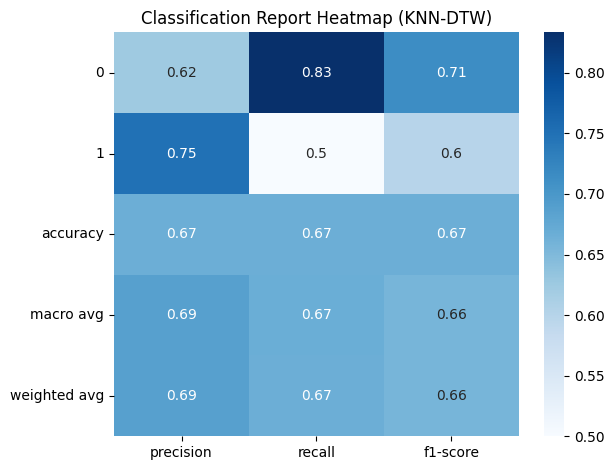

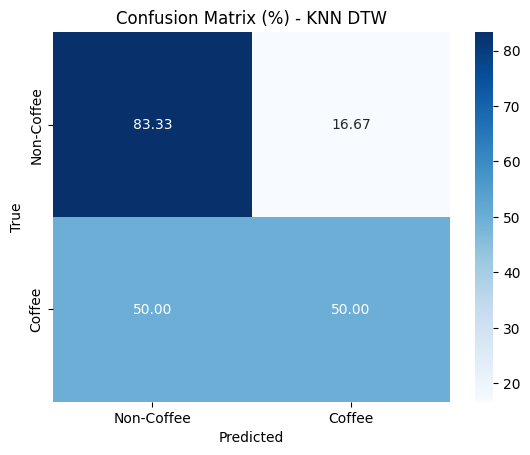

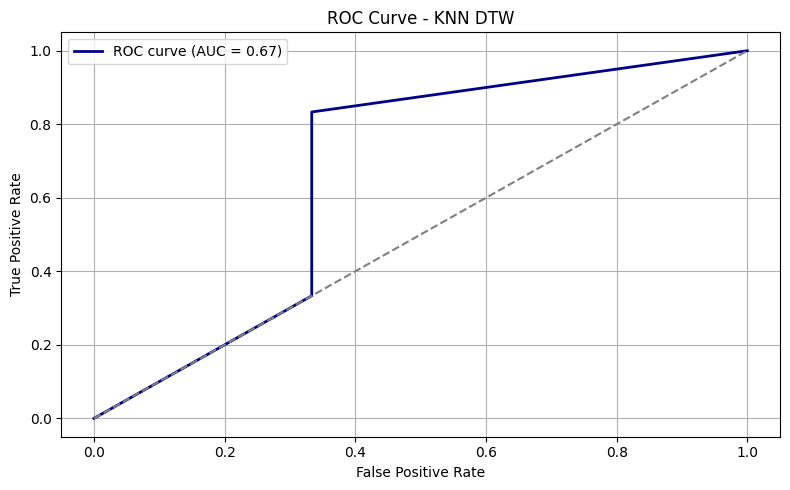

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/tmp/ipython-input-5-3100178136.py:122: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date_obj = pd.to_datetime(str(date_str), errors='coerce')
/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/tmp/ipython-input-5-3100178136.py:122: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date_obj = pd.to_datetime(str(date_str), errors='coerce')
/usr/local/lib/python3.11/dist-package


📊 Predictions on Validation Samples:

satveg_coffee sample 06_Fazenda  Cinco Estrelas.xlsx:
  ↳ Predicted: Non-Coffee ❌
  ↳ Probability - Coffee: 0.33 | Non-Coffee: 0.67
------------------------------------------------------------
satveg_coffee sample 01_Fazenda Boa Vista.xlsx:
  ↳ Predicted: Coffee ✅
  ↳ Probability - Coffee: 0.67 | Non-Coffee: 0.33
------------------------------------------------------------
satveg_coffee sample 02_Fazenda Boa Vista.xlsx.xlsx:
  ↳ Predicted: Coffee ✅
  ↳ Probability - Coffee: 0.67 | Non-Coffee: 0.33
------------------------------------------------------------
satveg_coffee sample 03_Fazenda Boa Vista.xlsx:
  ↳ Predicted: Coffee ✅
  ↳ Probability - Coffee: 0.67 | Non-Coffee: 0.33
------------------------------------------------------------
satveg_coffee sample 04_Fazenda Cinco Estrelas.xlsx:
  ↳ Predicted: Non-Coffee ❌
  ↳ Probability - Coffee: 0.33 | Non-Coffee: 0.67
------------------------------------------------------------
satveg_coffee sample 0

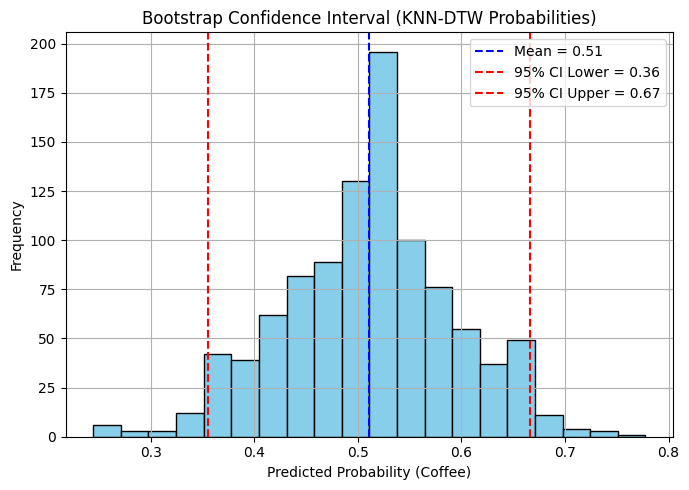

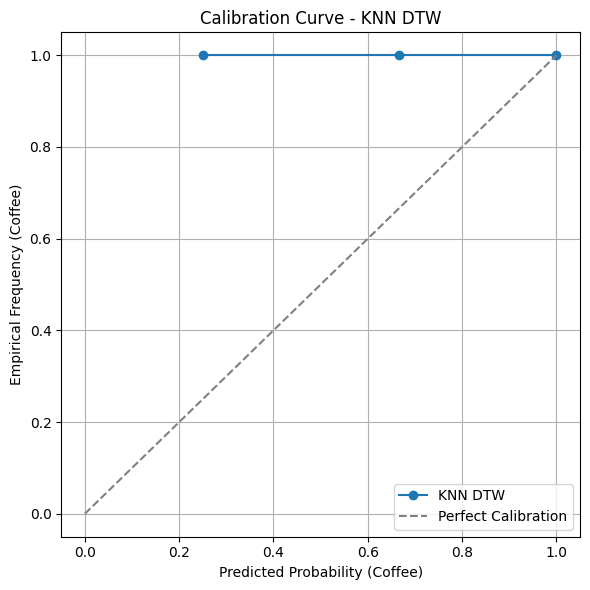

In [5]:
!pip install tslearn

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.calibration import calibration_curve
from sklearn.utils import resample
from tslearn.neighbors import KNeighborsTimeSeriesClassifier
from tslearn.preprocessing import TimeSeriesScalerMinMax
from tqdm import tqdm
from google.colab import drive


X = filtered_dataset[ndvi_dates].values
y = filtered_dataset['Coffee (1-YES; 0-NO)'].values

# Scale to [0, 1]
scaler = TimeSeriesScalerMinMax()
X_scaled = scaler.fit_transform(X.reshape((X.shape[0], X.shape[1], 1)))

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train KNN DTW
knn_dtw = KNeighborsTimeSeriesClassifier(n_neighbors=3, metric="dtw")
knn_dtw.fit(X_train, y_train)

# Predict and Evaluate
y_pred = knn_dtw.predict(X_test)
y_proba = knn_dtw.predict_proba(X_test)[:, 1]

# Stratified K-Fold CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
precision_list, recall_list, f1_list = [], [], []

print("\n Starting Stratified 5-Fold Cross-Validation (KNN-DTW):\n")

for train_idx, test_idx in tqdm(skf.split(X_scaled, y), total=5):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # KNN DTW Model
    knn_dtw = KNeighborsTimeSeriesClassifier(n_neighbors=3, metric="dtw")
    knn_dtw.fit(X_train, y_train)

    # Predict
    y_pred = knn_dtw.predict(X_test)

    # Evaluation
    precision_list.append(precision_score(y_test, y_pred, zero_division=0))
    recall_list.append(recall_score(y_test, y_pred, zero_division=0))
    f1_list.append(f1_score(y_test, y_pred, zero_division=0))

# Results
print(f"\n✅ Stratified 5-Fold CV Results for KNN-DTW:")
print(f"Average Precision: {np.mean(precision_list)*100:.2f}%")
print(f"Average Recall:    {np.mean(recall_list)*100:.2f}%")
print(f"Average F1-Score:  {np.mean(f1_list)*100:.2f}%")

print("\n Classification Report:\n")
print(classification_report(y_test, y_pred))

# Heatmap
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report Heatmap (KNN-DTW)')
plt.tight_layout()
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Non-Coffee', 'Coffee'],
            yticklabels=['Non-Coffee', 'Coffee'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (%) - KNN DTW')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN DTW")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#=============================================================#

# K-NN DTW Validation using real samples (automatic)

drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/Dissertação/dataset ndvi/validation sample'

validation_probs = []
results = []

for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_excel(file_path, sheet_name=0)
        df_t = df.transpose()

        date_row = df_t.iloc[0, 4:]
        valid_cols = []

        for i, date_str in enumerate(date_row):
            try:
                date_obj = pd.to_datetime(str(date_str), errors='coerce')
                if date_obj and date_obj.year >= 2019:
                    valid_cols.append(i + 4)
            except:
                continue

        ndvi_values = df_t.iloc[1, valid_cols].astype(float).values.reshape(1, -1, 1)
        ndvi_scaled = scaler.transform(ndvi_values)

        predicted_label = knn_dtw.predict(ndvi_scaled)[0]
        proba = knn_dtw.predict_proba(ndvi_scaled)[0]

        validation_probs.append(proba[1])
        results.append({
            'File': filename,
            'Predicted_Label': 'Coffee ✅' if predicted_label == 1 else 'Non-Coffee ❌',
            'Prob_Coffee': round(proba[1], 4),
            'Prob_Non_Coffee': round(proba[0], 4)
        })

results_df = pd.DataFrame(results)

print("\n📊 Predictions on Validation Samples:\n")
for idx, row in results_df.iterrows():
    print(f"{row['File']}:")
    print(f"  ↳ Predicted: {row['Predicted_Label']}")
    print(f"  ↳ Probability - Coffee: {row['Prob_Coffee']:.2f} | Non-Coffee: {row['Prob_Non_Coffee']:.2f}")
    print("-" * 60)

# Summary statistics on validation probabilities
mean_coffee = results_df['Prob_Coffee'].mean()
std_coffee = results_df['Prob_Coffee'].std()
mean_non_coffee = results_df['Prob_Non_Coffee'].mean()
std_non_coffee = results_df['Prob_Non_Coffee'].std()

print("📈 Summary Statistics on Validation Probabilities:")
print(f"Coffee Probability     - Mean: {mean_coffee:.4f} | Std Dev: {std_coffee:.4f}")
print(f"Non-Coffee Probability - Mean: {mean_non_coffee:.4f} | Std Dev: {std_non_coffee:.4f}")
print("-" * 60, "\n")

# Bootstrap
boot_means = [np.mean(resample(validation_probs, replace=True)) for _ in range(1000)]
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)
mean_prob = np.mean(validation_probs)

plt.figure(figsize=(7, 5))
plt.hist(boot_means, bins=20, color='skyblue', edgecolor='black')
plt.axvline(mean_prob, color='blue', linestyle='dashed', label=f"Mean = {mean_prob:.2f}")
plt.axvline(ci_lower, color='red', linestyle='--', label=f"95% CI Lower = {ci_lower:.2f}")
plt.axvline(ci_upper, color='red', linestyle='--', label=f"95% CI Upper = {ci_upper:.2f}")
plt.title('Bootstrap Confidence Interval (KNN-DTW Probabilities)')
plt.xlabel('Predicted Probability (Coffee)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calibration Curve
true_labels = [1] * len(validation_probs)
prob_true, prob_pred = calibration_curve(true_labels, validation_probs, n_bins=3)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='KNN DTW')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Predicted Probability (Coffee)')
plt.ylabel('Empirical Frequency (Coffee)')
plt.title('Calibration Curve - KNN DTW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Coffee Classification - Logistic Regression


⏱️ Starting Stratified 5-Fold Cross-Validation (Logistic Regression):

Fold 1: Precision = 0.67, Recall = 0.33, F1-Score = 0.44, Accuracy = 0.58
Fold 2: Precision = 0.83, Recall = 0.83, F1-Score = 0.83, Accuracy = 0.83
Fold 3: Precision = 0.75, Recall = 1.00, F1-Score = 0.86, Accuracy = 0.83
Fold 4: Precision = 0.83, Recall = 0.83, F1-Score = 0.83, Accuracy = 0.83
Fold 5: Precision = 0.83, Recall = 0.83, F1-Score = 0.83, Accuracy = 0.83

✅ Stratified 5-Fold CV Results for Logistic Regression:
Average Precision: 78.33%
Average Recall:    76.67%
Average F1-Score:  76.03%
Average Accuracy:  78.33%

Classification Report:

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



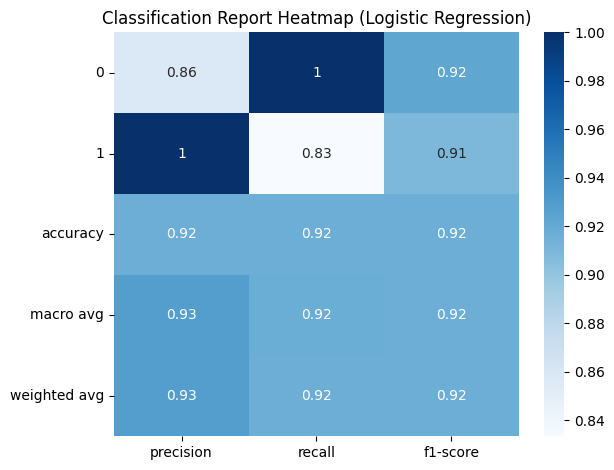

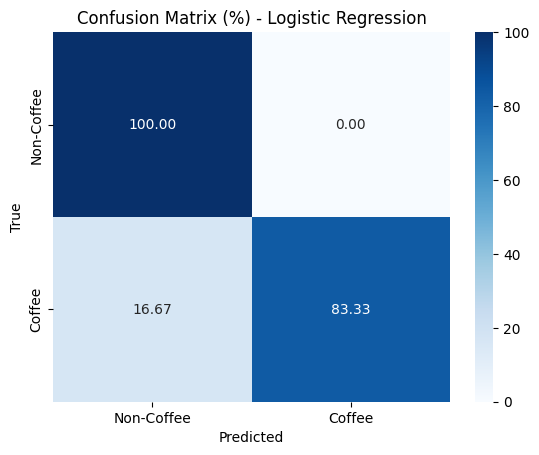

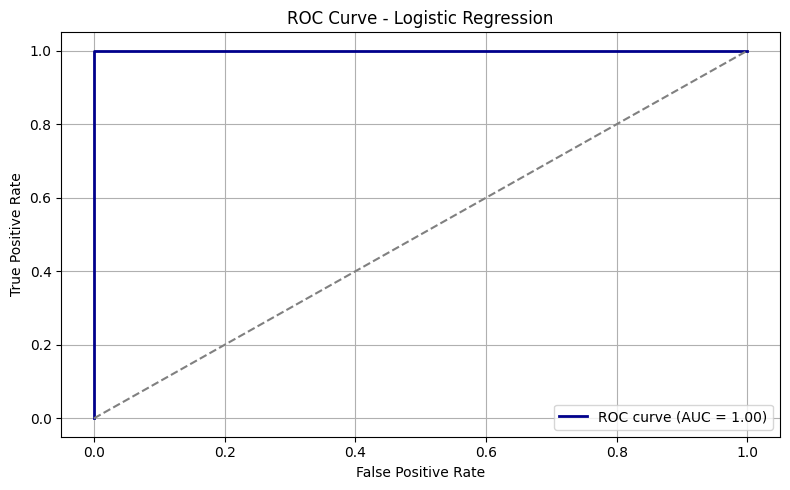

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/tmp/ipython-input-10-569668179.py:140: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date_obj = pd.to_datetime(str(date_str), errors='coerce')
/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/tmp/ipython-input-10-569668179.py:140: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date_obj = pd.to_datetime(str(date_str), errors='coerce')
/usr/local/lib/python3.11/dist-package


📊 Predictions on Validation Samples:

satveg_coffee sample 06_Fazenda  Cinco Estrelas.xlsx:
  → Predicted: Coffee ✅
  → Probability - Coffee: 0.66 | Non-Coffee: 0.34
------------------------------------------------------------
satveg_coffee sample 01_Fazenda Boa Vista.xlsx:
  → Predicted: Coffee ✅
  → Probability - Coffee: 0.61 | Non-Coffee: 0.39
------------------------------------------------------------
satveg_coffee sample 02_Fazenda Boa Vista.xlsx.xlsx:
  → Predicted: Coffee ✅
  → Probability - Coffee: 0.86 | Non-Coffee: 0.14
------------------------------------------------------------
satveg_coffee sample 03_Fazenda Boa Vista.xlsx:
  → Predicted: Coffee ✅
  → Probability - Coffee: 0.88 | Non-Coffee: 0.12
------------------------------------------------------------
satveg_coffee sample 04_Fazenda Cinco Estrelas.xlsx:
  → Predicted: Coffee ✅
  → Probability - Coffee: 0.90 | Non-Coffee: 0.10
------------------------------------------------------------
satveg_coffee sample 05_Fazend

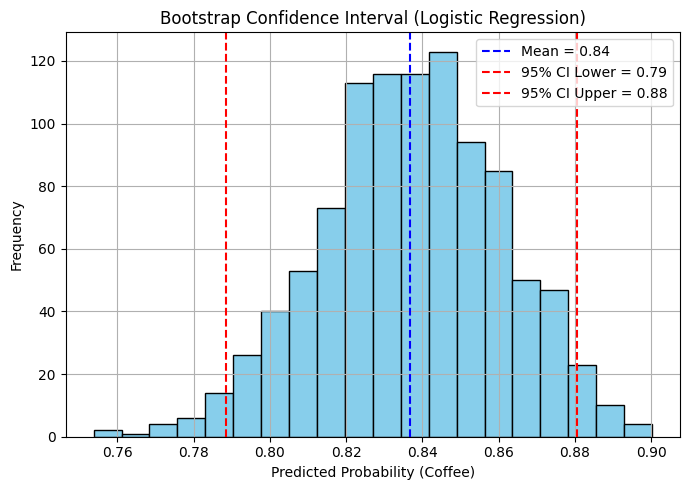

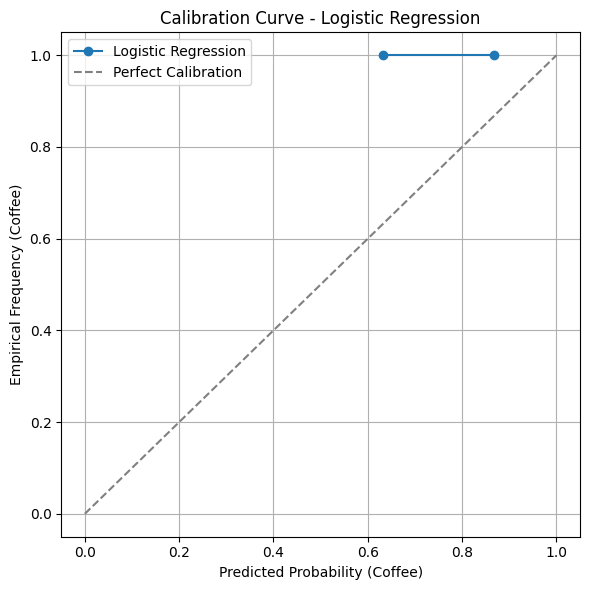

In [10]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.calibration import calibration_curve
from sklearn.utils import resample
from google.colab import drive


X = filtered_dataset[ndvi_dates].values
y = filtered_dataset['Coffee (1-YES; 0-NO)'].values

# Scale features to [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Logistic Regression
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', class_weight='balanced', max_iter=1000, random_state=42)

# Train and Evaluate
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
precision_list, recall_list, f1_list, accuracy_list = [], [], [], []

print("\n⏱️ Starting Stratified 5-Fold Cross-Validation (Logistic Regression):\n")

for fold, (train_idx, test_idx) in enumerate(skf.split(X_scaled, y), 1):
    X_train_fold, X_test_fold = X_scaled[train_idx], X_scaled[test_idx]
    y_train_fold, y_test_fold = y[train_idx], y[test_idx]

    # Logistic Regression model
    log_reg_fold = LogisticRegression(
        penalty='l2',
        C=1.0,
        solver='lbfgs',
        class_weight='balanced',
        max_iter=1000,
        random_state=42
    )

    # Train
    log_reg_fold.fit(X_train_fold, y_train_fold)

    # Predict
    y_pred_fold = log_reg_fold.predict(X_test_fold)

    # Metrics
    precision = precision_score(y_test_fold, y_pred_fold, zero_division=0)
    recall = recall_score(y_test_fold, y_pred_fold, zero_division=0)
    f1 = f1_score(y_test_fold, y_pred_fold, zero_division=0)
    accuracy = accuracy_score(y_test_fold, y_pred_fold)

    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    accuracy_list.append(accuracy)

    print(f"Fold {fold}: Precision = {precision:.2f}, Recall = {recall:.2f}, "
          f"F1-Score = {f1:.2f}, Accuracy = {accuracy:.2f}")

# Final average results
print("\n✅ Stratified 5-Fold CV Results for Logistic Regression:")
print(f"Average Precision: {np.mean(precision_list) * 100:.2f}%")
print(f"Average Recall:    {np.mean(recall_list) * 100:.2f}%")
print(f"Average F1-Score:  {np.mean(f1_list) * 100:.2f}%")
print(f"Average Accuracy:  {np.mean(accuracy_list) * 100:.2f}%")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Heatmap
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report Heatmap (Logistic Regression)')
plt.tight_layout()
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Non-Coffee', 'Coffee'],
            yticklabels=['Non-Coffee', 'Coffee'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (%) - Logistic Regression')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =============================================================#

# Logistic Regression Validation using real samples (automatic)

drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/Dissertac\u0327a\u0303o/dataset ndvi/validation sample'

validation_probs = []
results = []

for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_excel(file_path, sheet_name=0)
        df_t = df.transpose()

        date_row = df_t.iloc[0, 4:]
        valid_cols = []

        for i, date_str in enumerate(date_row):
            try:
                date_obj = pd.to_datetime(str(date_str), errors='coerce')
                if date_obj and date_obj.year >= 2019:
                    valid_cols.append(i + 4)
            except:
                continue

        ndvi_values = df_t.iloc[1, valid_cols].astype(float).values.reshape(1, -1)
        ndvi_scaled = scaler.transform(ndvi_values)

        predicted_label = log_reg.predict(ndvi_scaled)[0]
        proba = log_reg.predict_proba(ndvi_scaled)[0]

        validation_probs.append(proba[1])
        results.append({
            'File': filename,
            'Predicted_Label': 'Coffee ✅' if predicted_label == 1 else 'Non-Coffee ❌',
            'Prob_Coffee': round(proba[1], 4),
            'Prob_Non_Coffee': round(proba[0], 4)
        })

results_df = pd.DataFrame(results)

print("\n\U0001f4ca Predictions on Validation Samples:\n")
for idx, row in results_df.iterrows():
    print(f"{row['File']}:")
    print(f"  \u2192 Predicted: {row['Predicted_Label']}")
    print(f"  \u2192 Probability - Coffee: {row['Prob_Coffee']:.2f} | Non-Coffee: {row['Prob_Non_Coffee']:.2f}")
    print("-" * 60)

# Summary statistics on validation probabilities
mean_coffee = results_df['Prob_Coffee'].mean()
std_coffee = results_df['Prob_Coffee'].std()
mean_non_coffee = results_df['Prob_Non_Coffee'].mean()
std_non_coffee = results_df['Prob_Non_Coffee'].std()

print("📈 Summary Statistics on Validation Probabilities:")
print(f"Coffee Probability     - Mean: {mean_coffee:.4f} | Std Dev: {std_coffee:.4f}")
print(f"Non-Coffee Probability - Mean: {mean_non_coffee:.4f} | Std Dev: {std_non_coffee:.4f}")
print("-" * 60, "\n")

# Bootstrap
boot_means = [np.mean(resample(validation_probs, replace=True)) for _ in range(1000)]
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)
mean_prob = np.mean(validation_probs)

plt.figure(figsize=(7, 5))
plt.hist(boot_means, bins=20, color='skyblue', edgecolor='black')
plt.axvline(mean_prob, color='blue', linestyle='dashed', label=f"Mean = {mean_prob:.2f}")
plt.axvline(ci_lower, color='red', linestyle='--', label=f"95% CI Lower = {ci_lower:.2f}")
plt.axvline(ci_upper, color='red', linestyle='--', label=f"95% CI Upper = {ci_upper:.2f}")
plt.title('Bootstrap Confidence Interval (Logistic Regression)')
plt.xlabel('Predicted Probability (Coffee)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calibration Curve
true_labels = [1] * len(validation_probs)
prob_true, prob_pred = calibration_curve(true_labels, validation_probs, n_bins=3)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Predicted Probability (Coffee)')
plt.ylabel('Empirical Frequency (Coffee)')
plt.title('Calibration Curve - Logistic Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Coffee Classification - Support Vector Machine (SVM)


⏱️ Starting Stratified 5-Fold Cross-Validation (SVM):

Fold 1: Precision = 0.67, Recall = 0.33, F1-Score = 0.44, Accuracy = 0.58
Fold 2: Precision = 0.83, Recall = 0.83, F1-Score = 0.83, Accuracy = 0.83
Fold 3: Precision = 0.75, Recall = 1.00, F1-Score = 0.86, Accuracy = 0.83
Fold 4: Precision = 0.83, Recall = 0.83, F1-Score = 0.83, Accuracy = 0.83
Fold 5: Precision = 0.86, Recall = 1.00, F1-Score = 0.92, Accuracy = 0.92

✅ Stratified 5-Fold CV Results for SVM:
Average Precision: 78.81%
Average Recall:    80.00%
Average F1-Score:  77.83%
Average Accuracy:  80.00%

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



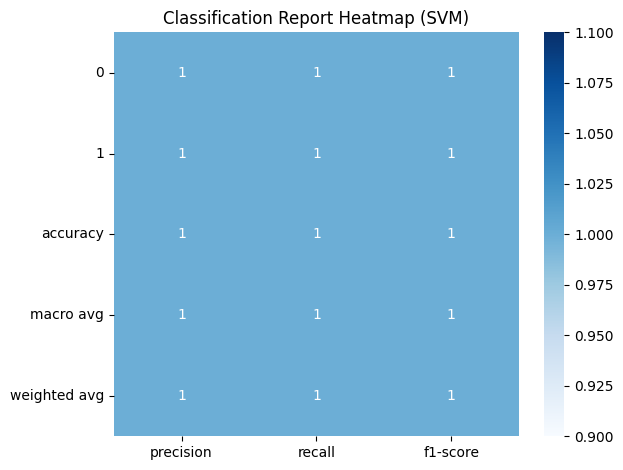

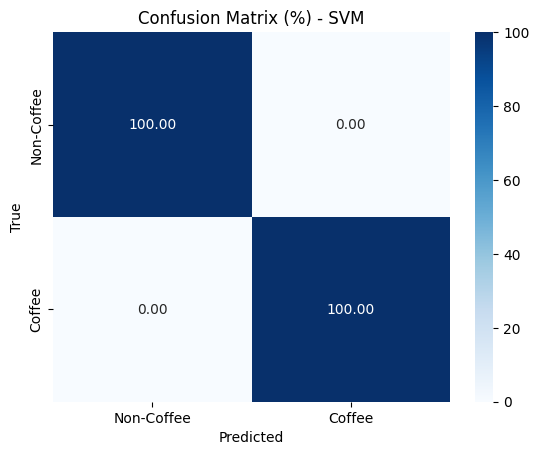

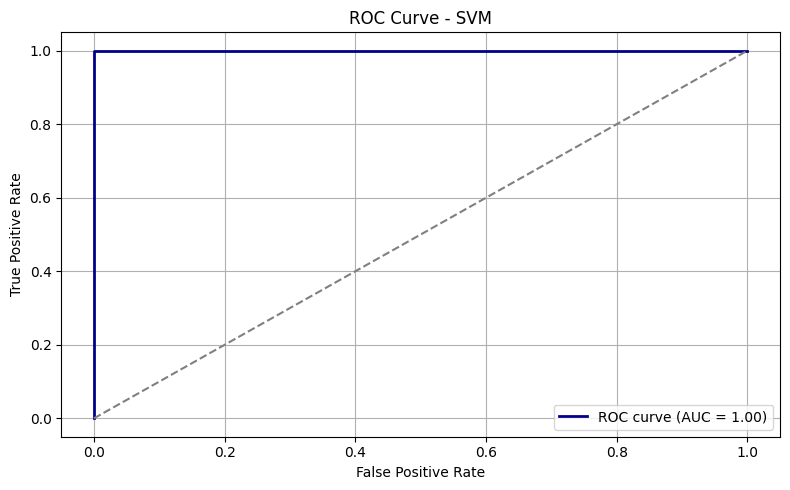

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/tmp/ipython-input-11-3975890175.py:138: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date_obj = pd.to_datetime(str(date_str), errors='coerce')
/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/tmp/ipython-input-11-3975890175.py:138: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  date_obj = pd.to_datetime(str(date_str), errors='coerce')
/usr/local/lib/python3.11/dist-packa


📊 Predictions on Validation Samples (SVM):

satveg_coffee sample 06_Fazenda  Cinco Estrelas.xlsx:
  → Predicted: Coffee ✅
  → Probability - Coffee: 0.65 | Non-Coffee: 0.35
------------------------------------------------------------
satveg_coffee sample 01_Fazenda Boa Vista.xlsx:
  → Predicted: Coffee ✅
  → Probability - Coffee: 0.58 | Non-Coffee: 0.42
------------------------------------------------------------
satveg_coffee sample 02_Fazenda Boa Vista.xlsx.xlsx:
  → Predicted: Coffee ✅
  → Probability - Coffee: 0.79 | Non-Coffee: 0.21
------------------------------------------------------------
satveg_coffee sample 03_Fazenda Boa Vista.xlsx:
  → Predicted: Coffee ✅
  → Probability - Coffee: 0.81 | Non-Coffee: 0.19
------------------------------------------------------------
satveg_coffee sample 04_Fazenda Cinco Estrelas.xlsx:
  → Predicted: Coffee ✅
  → Probability - Coffee: 0.92 | Non-Coffee: 0.08
------------------------------------------------------------
satveg_coffee sample 05_

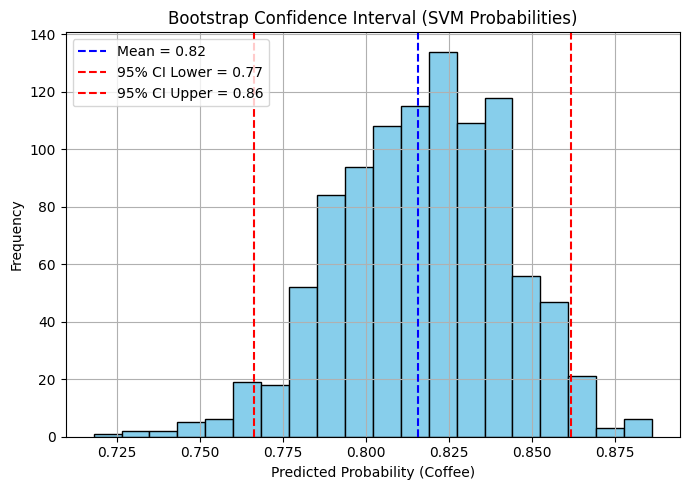

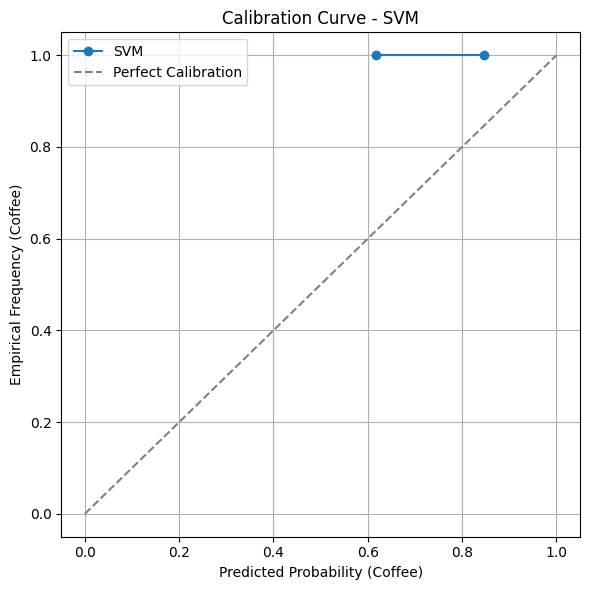

In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.calibration import calibration_curve
from sklearn.utils import resample
from google.colab import drive

X = filtered_dataset[ndvi_dates].values
y = filtered_dataset['Coffee (1-YES; 0-NO)'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# SVM Model
svm = SVC(kernel='rbf', probability=True, class_weight='balanced', C=1.0, gamma='scale', random_state=42)

# Final Training
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
y_proba = svm.predict_proba(X_test)[:, 1]

# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
precision_list, recall_list, f1_list, accuracy_list = [], [], [], []

print("\n⏱️ Starting Stratified 5-Fold Cross-Validation (SVM):\n")

for fold, (train_idx, test_idx) in enumerate(skf.split(X_scaled, y), 1):
    X_train_fold, X_test_fold = X_scaled[train_idx], X_scaled[test_idx]
    y_train_fold, y_test_fold = y[train_idx], y[test_idx]

    # Define SVM model
    svm_fold = SVC(
        kernel='rbf',
        probability=True,
        class_weight='balanced',
        C=1.0,
        gamma='scale',
        random_state=42
    )

    # Train and predict
    svm_fold.fit(X_train_fold, y_train_fold)
    y_pred_fold = svm_fold.predict(X_test_fold)

    # Metrics
    precision = precision_score(y_test_fold, y_pred_fold, zero_division=0)
    recall = recall_score(y_test_fold, y_pred_fold, zero_division=0)
    f1 = f1_score(y_test_fold, y_pred_fold, zero_division=0)
    accuracy = accuracy_score(y_test_fold, y_pred_fold)

    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    accuracy_list.append(accuracy)

    print(f"Fold {fold}: Precision = {precision:.2f}, Recall = {recall:.2f}, "
          f"F1-Score = {f1:.2f}, Accuracy = {accuracy:.2f}")

# Final results
print("\n✅ Stratified 5-Fold CV Results for SVM:")
print(f"Average Precision: {np.mean(precision_list) * 100:.2f}%")
print(f"Average Recall:    {np.mean(recall_list) * 100:.2f}%")
print(f"Average F1-Score:  {np.mean(f1_list) * 100:.2f}%")
print(f"Average Accuracy:  {np.mean(accuracy_list) * 100:.2f}%")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Heatmap
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report Heatmap (SVM)')
plt.tight_layout()
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_percent = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Non-Coffee', 'Coffee'],
            yticklabels=['Non-Coffee', 'Coffee'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (%) - SVM')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, color='darkblue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - SVM")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# =============================================================#

# SVM Validation using real samples (automatic)

drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/Dissertação/dataset ndvi/validation sample'

validation_probs = []
results = []

for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):
        file_path = os.path.join(folder_path, filename)
        df = pd.read_excel(file_path, sheet_name=0)
        df_t = df.transpose()

        date_row = df_t.iloc[0, 4:]
        valid_cols = []

        for i, date_str in enumerate(date_row):
            try:
                date_obj = pd.to_datetime(str(date_str), errors='coerce')
                if date_obj and date_obj.year >= 2019:
                    valid_cols.append(i + 4)
            except:
                continue

        ndvi_values = df_t.iloc[1, valid_cols].astype(float).values.reshape(1, -1)
        ndvi_scaled = scaler.transform(ndvi_values)

        predicted_label = svm.predict(ndvi_scaled)[0]
        proba = svm.predict_proba(ndvi_scaled)[0]

        validation_probs.append(proba[1])
        results.append({
            'File': filename,
            'Predicted_Label': 'Coffee ✅' if predicted_label == 1 else 'Non-Coffee ❌',
            'Prob_Coffee': round(proba[1], 4),
            'Prob_Non_Coffee': round(proba[0], 4)
        })

results_df = pd.DataFrame(results)

print("\n📊 Predictions on Validation Samples (SVM):\n")
for idx, row in results_df.iterrows():
    print(f"{row['File']}:")
    print(f"  → Predicted: {row['Predicted_Label']}")
    print(f"  → Probability - Coffee: {row['Prob_Coffee']:.2f} | Non-Coffee: {row['Prob_Non_Coffee']:.2f}")
    print("-" * 60)

# Summary statistics
mean_coffee = results_df['Prob_Coffee'].mean()
std_coffee = results_df['Prob_Coffee'].std()
mean_non_coffee = results_df['Prob_Non_Coffee'].mean()
std_non_coffee = results_df['Prob_Non_Coffee'].std()

print("📈 Summary Statistics on Validation Probabilities:")
print(f"Coffee Probability     - Mean: {mean_coffee:.4f} | Std Dev: {std_coffee:.4f}")
print(f"Non-Coffee Probability - Mean: {mean_non_coffee:.4f} | Std Dev: {std_non_coffee:.4f}")
print("-" * 60, "\n")

# Bootstrap
boot_means = [np.mean(resample(validation_probs, replace=True)) for _ in range(1000)]
ci_lower = np.percentile(boot_means, 2.5)
ci_upper = np.percentile(boot_means, 97.5)
mean_prob = np.mean(validation_probs)

plt.figure(figsize=(7, 5))
plt.hist(boot_means, bins=20, color='skyblue', edgecolor='black')
plt.axvline(mean_prob, color='blue', linestyle='dashed', label=f"Mean = {mean_prob:.2f}")
plt.axvline(ci_lower, color='red', linestyle='--', label=f"95% CI Lower = {ci_lower:.2f}")
plt.axvline(ci_upper, color='red', linestyle='--', label=f"95% CI Upper = {ci_upper:.2f}")
plt.title('Bootstrap Confidence Interval (SVM Probabilities)')
plt.xlabel('Predicted Probability (Coffee)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Calibration Curve
true_labels = [1] * len(validation_probs)
prob_true, prob_pred = calibration_curve(true_labels, validation_probs, n_bins=3)

plt.figure(figsize=(6, 6))
plt.plot(prob_pred, prob_true, marker='o', label='SVM')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.xlabel('Predicted Probability (Coffee)')
plt.ylabel('Empirical Frequency (Coffee)')
plt.title('Calibration Curve - SVM')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()